# DS 210 Homework 4 




## Decision Trees for regression



3. (12 points) In this problem, you are asked to use decision trees for regression with two
different target loss functions: minimum square error and minimum absolute error.
Design a function f : [0, 1] → [0, 1] such that when you sample input points X𝑖 from [0, 1]
and use the sequence (X𝑖 , f(X𝑖)) as your input, you are likely to see the difference
between the two loss functions with six leafs (i.e., with max_leaf_nodes=6).
Among other things, your solution should contain:  
a. a plot of f and the two functions resulting from the training process under different
loss functions,  
b. an explanation of the differences and how they are a result of differences
between the two loss functions.  
  
Note: Make sure you read the documentation for sklearn.tree.DecisionTreeRegressor
including usage examples
https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

In [475]:
# A
import numpy as np
import pandas as pd
import random 
from scipy.optimize import least_squares
import math
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

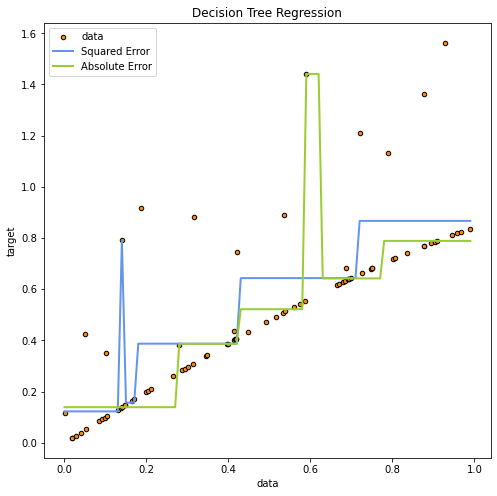

A) A plot of f and the two functions resulting from the training process


In [476]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# CREATE DATA (From [0,1])
rng = np.random.RandomState(1)
X = np.sort(1 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (1.0 - rng.rand(16))


# Fit regression model

# Fit regression model 1
# Decision Tree Regressor using "Squared Error" , to find the minimum square error
regr_1 = DecisionTreeRegressor(criterion='squared_error',max_leaf_nodes=6,max_depth=6)


# Fit regression model 2
# Decision Tree Regressor using "absolute_error", to find the minimum absolute_error
regr_2 = DecisionTreeRegressor(criterion='absolute_error',max_leaf_nodes=6, max_depth=6)


regr_1.fit(X, y)
regr_2.fit(X, y)

'''If we would like to observe the visualization of the tree we could run this code below'''
# print(tree.export_text(regr_1))
# print(tree.export_text(regr_2))

# Predict
X_test = np.arange(0.0, 1.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)



# Plot the results
plt.figure(figsize=(8,8))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="Squared Error", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="Absolute Error", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

print("A) A plot of f and the two functions resulting from the training process" )


In [480]:
#B
print('B)\n')

print('The differneces between the Minimum Squared Error and the Minimum Absolute Error (which are the two loss functions we used for this exersice), is that:\n\n- MAE minimizes the L1 loss using the each-terminal node and measures how close the predictions are to the outcomes. \n\n- However, MSE uses variance reduction as feature-selection criterion and minimizes the L2 loss using the mean of each terminal node; measuring the the difference between the estimator and estimated.')


B)

The differneces between the Minimum Squared Error and the Minimum Absolute Error (which are the two loss functions we used for this exersice), is that:

- MAE minimizes the L1 loss using the each-terminal node and measures how close the predictions are to the outcomes. 

- However, MSE uses variance reduction as feature-selection criterion and minimizes the L2 loss using the mean of each terminal node; measuring the the difference between the estimator and estimated.


## Examples of Overfitting and Underfitting



In [564]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [565]:
# Set the random seed for reproducible results
np.random.seed(42)

# Generating function [0,1]
def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x values and y values
x = np.sort(np.random.rand(120))
y = true_gen(x) + 0.1 * np.random.randn(len(x))

In [567]:
# Random indices for creating training and testing sets
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
xt = x[random_ind]
yt = y[random_ind]

# Training and testing observations
train = xt[:int(0.7 * len(x))]
test = xt[int(0.7 * len(x)):]

y_train = yt[:int(0.7 * len(y))]
y_test = yt[int(0.7 * len(y)):]

# Model the true curve
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

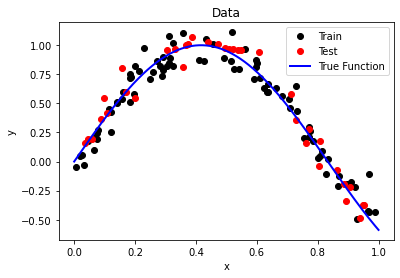

In [529]:
# Visualize observations and true curve
plt.plot(train, y_train, 'ko', label = 'Train'); 
plt.plot(test, y_test, 'ro', label = 'Test')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'True Function')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');

In [523]:
# Polynomial Fit Function 

def fit_poly(train, y_train, test, y_test, degrees, plot='train', return_scores=False):
    
    # Create a polynomial transformation of features
    features = PolynomialFeatures(degree=degrees, include_bias=False)
    
    # Reshape training features for use in scikit-learn and transform features
    train = train.reshape((-1, 1))
    train_trans = features.fit_transform(train)
    
    # Create the linear regression model and train
    model = LinearRegression()
    model.fit(train_trans, y_train)
    
    # Calculate the cross validation score
    cross_valid = cross_val_score(model, train_trans, y_train, scoring='neg_mean_squared_error', cv = 5)
    
    # Training predictions and error
    train_predictions = model.predict(train_trans)
    training_error = mean_squared_error(y_train, train_predictions)
    
    # Format test features
    test = test.reshape((-1, 1))
    test_trans = features.fit_transform(test)
    
    # Test set predictions and error
    test_predictions = model.predict(test_trans)
    testing_error = mean_squared_error(y_test, test_predictions)
    
    # Find the model curve and the true curve
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape((-1, 1))
    x_curve_trans = features.fit_transform(x_curve)
    
    # Model curve
    model_curve = model.predict(x_curve_trans)
    
    # True curve
    y_true_curve = true_gen(x_curve[:, 0])
    
    # Plot observations, true function, and model predicted function
    if plot == 'train':
        plt.plot(train[:, 0], y_train, 'ko', label = 'Observations')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'True Function')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Model Function')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Degree Model on Training Data'.format(degrees))
        plt.show()
        
    elif plot == 'test':
        # Plot the test observations and test predictions
        plt.plot(test, y_test, 'o', label = 'Test Observations')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'True Function')
        plt.plot(test, test_predictions, 'ro', label = 'Test Predictions')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y'); plt.title('{} Degree Model on Testing Data'.format(degrees)), plt.show();
    
    # Return the metrics
    if return_scores:
        return training_error, testing_error, -np.mean(cross_valid)
    

## Example of Underfitting
  * (When we use Degrees = 1)  
  
**The model Clearly underfits the function, as the Model data is not even close to the True function. As we can appreciate in the graphs below**

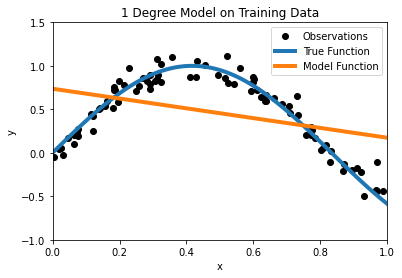

In [524]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

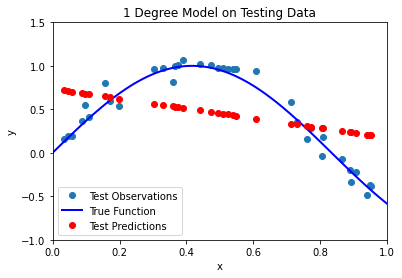

In [525]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='test')

## Example of Overfitting
  * (When we use Degrees = 25)  

**The model Clearly Overfits the function, as the Model data is has strange curves that cross the true function constantly. As we can appreciate in the graphs below**

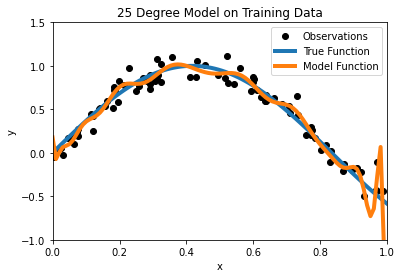

In [526]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 25)

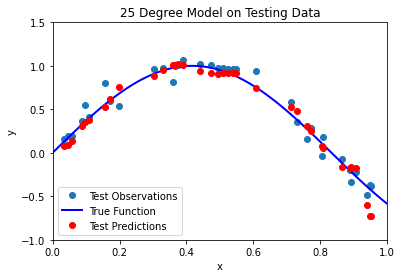

In [527]:
fit_poly(train, y_train, test, y_test, degrees=25, plot='test')

## Example of a Balanced Model
  * (When we use Degrees = 5)  
  
**The model fits correctly the function, as the Model data is almost the same as the True Function. Which means our training model has a correct result. As we can appreciate in the graphs below**

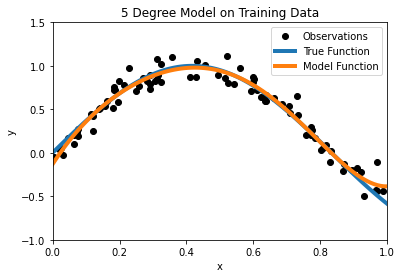

In [546]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 5)

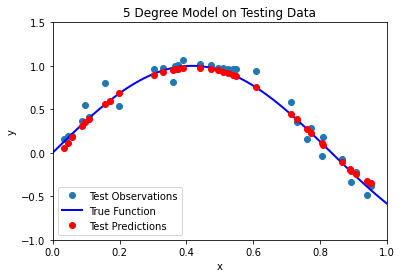

In [568]:
fit_poly(train, y_train, test, y_test, degrees=5, plot='test')

## Here is another good Visualization of UnderFitting / Overfitting 
(imported from scikit-learn.org )

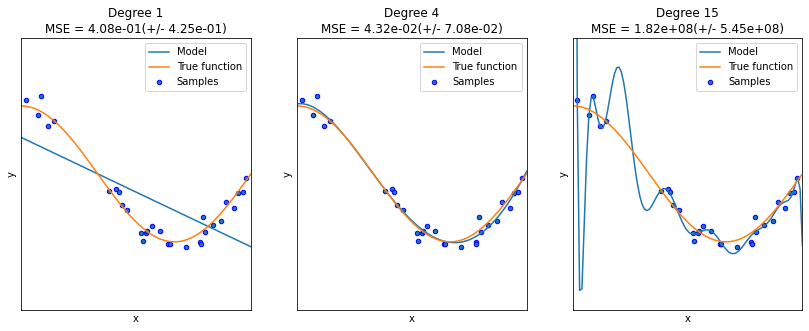

 -From this code we can clearly see the difference between underfitting (which is the graph of the left) 
and overfitting (which is the graph of the right)
 -We can see how the function of the model changes according to the amount 
of features and expressivness of the problem


In [179]:
# 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title('underfitting')#,'regular fitting','overfitting')
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    
    )
plt.show()

print(" -From this code we can clearly see the difference between underfitting (which is the graph of the left) \nand overfitting (which is the graph of the right)")
print(" -We can see how the function of the model changes according to the amount \nof features and expressivness of the problem")

#### From the graphs plotted above, we can appreciate 3 clear examples:
- The graph of the left (that uses only one degree) is a clear example of UnderFitting. The Model Function is not close to the True function.  
- The Center graph is an example of a balanced model (it uses 4 degrees), as the Model Function is almost identical to the True function. 
- The graph of the left is an example of Overfitting (it uses 15 degrees), as we can appreciate those strange curves of the model and how they differentiate from the True function.